In [14]:
# S-1.1 to install the seaborn lib
try:
    import seaborn as sns
except ModuleNotFoundError:
    print("Installing seaborn...")
    %pip install seaborn
    import seaborn as sns


In [15]:
# S-1.2 importing the other necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# S-2.1 loading the datasets
customers = pd.read_csv('Zeotap/Customers.csv')
products = pd.read_csv('Zeotap/Products.csv')
transactions = pd.read_csv('Zeotap/Transactions.csv')

In [17]:
# S- 2.2 Getting the overview of the datasets of the first few rows of each ds
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [18]:
# S-3 checking the missing values
print("\nMissing values in Customers:")
print(customers.isnull().sum())
print("\nMissing values in Products:")
print(products.isnull().sum())
print("\nMissing values in Transactions:")
print(transactions.isnull().sum())



Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


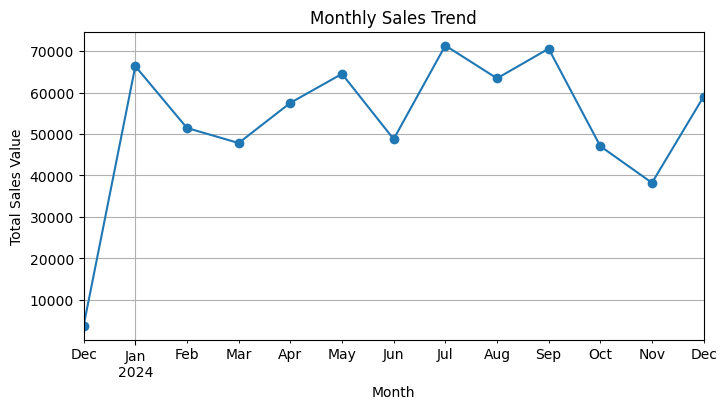

In [26]:
# S-4 EDA 
# S-4.1 analysing the monthly sales 
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(8,4))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid()
plt.show()


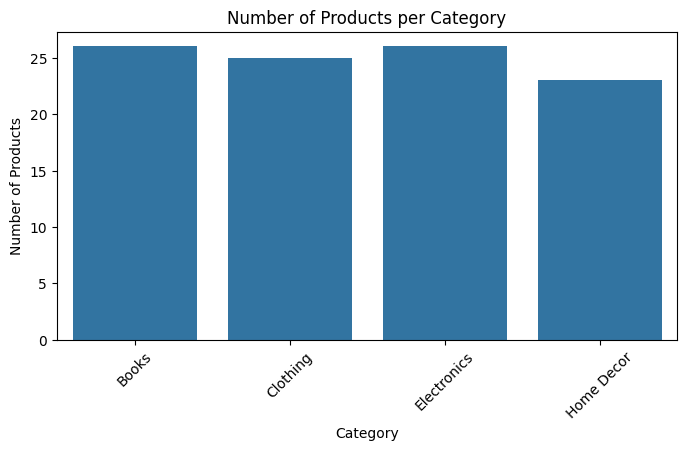

In [28]:
# S-4.2 analysing the product category
category_sales = products.groupby('Category')['ProductID'].count()
plt.figure(figsize=(8,4))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Number of Products per Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

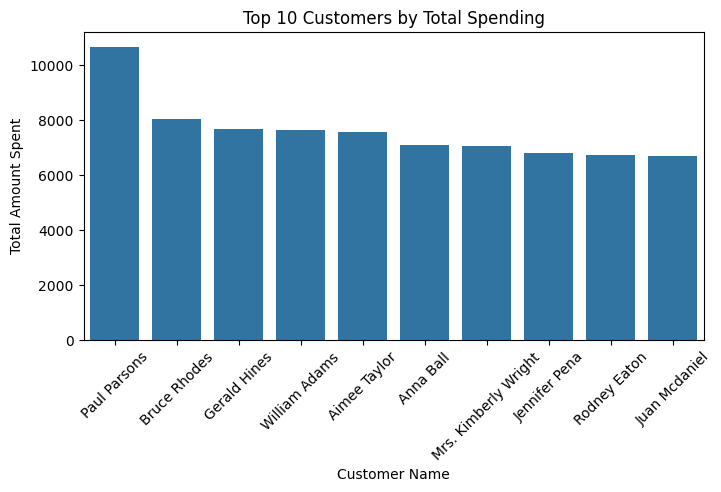

In [29]:
# S-4.3 analysing customer's spending 
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customer_names = customers.set_index('CustomerID').loc[top_customers.index]['CustomerName']
plt.figure(figsize=(8,4))
sns.barplot(x=top_customer_names, y=top_customers.values)
plt.title('Top 10 Customers by Total Spending')
plt.xticks(rotation=45)
plt.xlabel('Customer Name')
plt.ylabel('Total Amount Spent')
plt.show()

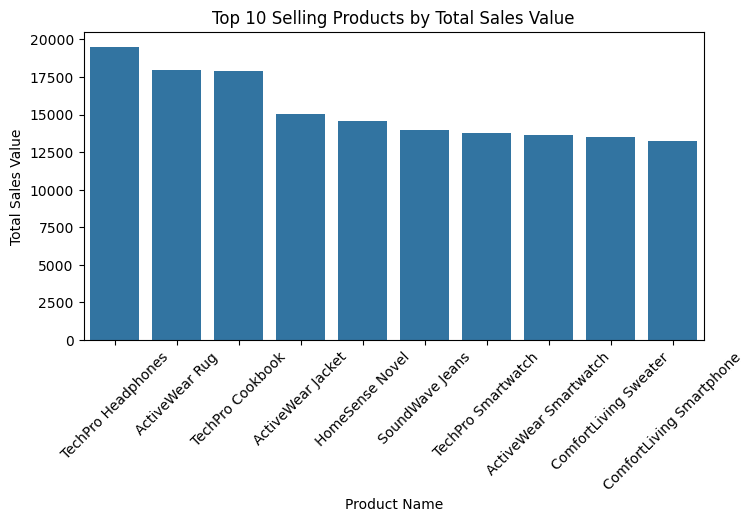

In [30]:
# S-4.4 analysis of top selling product by the total sales value
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_product_names = products.set_index('ProductID').loc[top_products.index]['ProductName']
plt.figure(figsize=(8,4))
sns.barplot(x=top_product_names, y=top_products.values)
plt.title('Top 10 Selling Products by Total Sales Value')
plt.xticks(rotation=45)
plt.xlabel('Product Name')
plt.ylabel('Total Sales Value')
plt.show()

<Axes: title={'center': 'Customer Count by Region'}, xlabel='Region', ylabel='Count'>

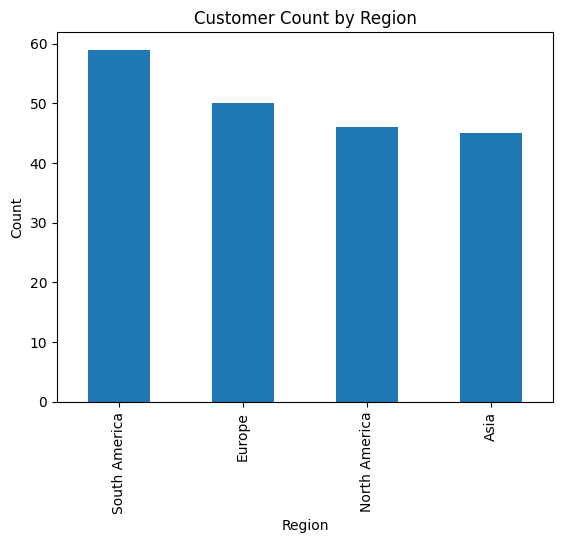

In [33]:
# S-4.5 analysising the customer distribution by the region
customer_count_by_region = customers['Region'].value_counts()
customer_count_by_region.plot(kind='bar', title='Customer Count by Region', xlabel='Region', ylabel='Count')